<a href="https://colab.research.google.com/github/farshid101/Deep-learning-Practice-/blob/main/DP_practices_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass classification

Importing

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
import datetime
print(datetime.datetime.now())

2023-06-20 14:20:53.684030


# Importing Dataset


*  We can import it using the tf.keras.datasets module.




In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
( x_train , y_train ) , (x_test , y_test ) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train[0] , y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10



# Label	Class
0	T-shirt/top ,
1	Trouser,
2	Pullover,
3	Dress,
4	Coat,
5	Sandal,
6	Shirt,
7	Sneaker,
8	Bag,
9	Ankle boot


# Visualise the Data

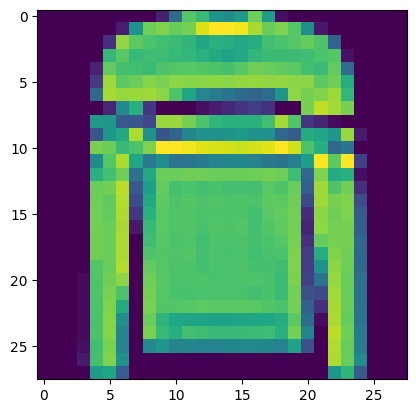

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[5])

### Making a function for visualize Data

In [ ]:
label =["T-shirt/top" ," Trouser", "Pullover"," Dress" , " Coat","Sandal" , " Shirt"," Sneaker" ," Bag", "Ankle boot"]
def view_Data( index_img= 0  , cat=label ):
  plt.figure(figsize=(6,6))
  plt.imshow(x_train[index_img])
  n= y_train[index_img]
  plt.title(cat[n])
  #plt.title("Bag")
  plt.show();

In [ ]:
cat=label
cat[0]

'T-shirt/top'

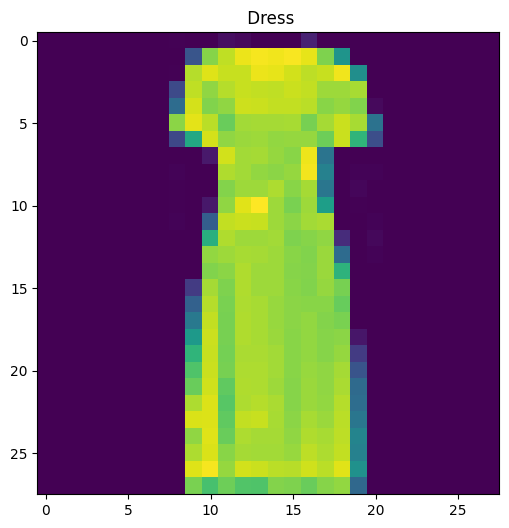

In [ ]:
view_Data(50 ,cat=label)

# Viewing using Random

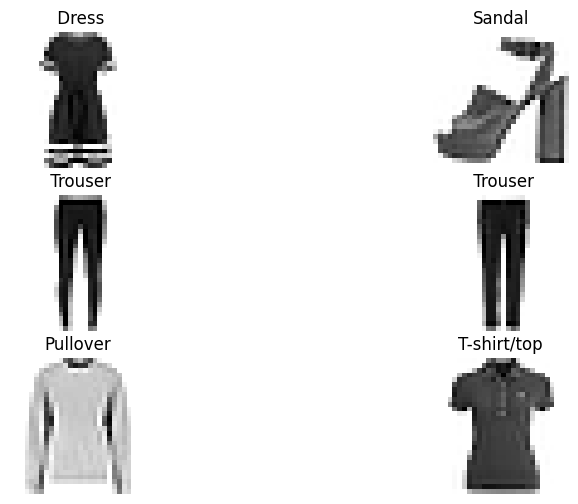

In [ ]:
import random

plt.figure(figsize=(10,6))

for i in range(6):
  ax=plt.subplot(3,2 ,i+1)
  random_index=random.choice(range(len(x_train)))
  plt.imshow(x_train[random_index] , cmap=plt.cm.binary)
  plt.title(label[y_train[random_index]])
  plt.axis(False)




Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.



# Creating Model

In [ ]:
#input shape
x_train.shape ,x_train.ndim

((60000, 28, 28), 3)

In [ ]:
#input Shape
28*28

784

In [ ]:
tf.random.set_seed(43)

#creating model

model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=(28 ,28)), # Here , 28*28 because the picture size is that
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(4 , activation="relu") ,
    tf.keras.layers.Dense(10 ,activation="softmax")  # Here , 10 is because label is 10

])


#creating compile for the model

model_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer =tf.keras.optimizers.Adam() ,
    metrics=["accuracy"]

)

#fit the model


history_1 =model_1.fit(
    x_train ,
  y_train ,
epochs=15
    ,
    validation_data=(x_test ,y_test)


)


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3308 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1010 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy:

In [ ]:

model_1.evaluate(x_train ,y_train )

1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026323318481445, 0.10000000149011612]

In [ ]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Model doing worest performance
### For imporving the model  , normalize the data

In [ ]:
x_train.max() , x_train.min()

(255, 0)

# Normalizing the training data  , by dividing all data with 255

In [ ]:
x_train_nol = x_train /255
x_test_nol = x_test /255

In [ ]:
x_train_nol.min() ,  x_train_nol.max()

(0.0, 1.0)

# Creating new Model , using normalizing data

In [ ]:
tf.random.set_seed(42)


#creating model

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,
    tf.keras.layers.Dense(4 ,activation="relu") ,
    tf.keras.layers.Dense(4 ,activation ="relu") ,
    tf.keras.layers.Dense(10 , activation ="softmax")
])


#creating model compile

model_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer =tf.keras.optimizers.Adam(),
    metrics ="accuracy"


)

#fit the model

history_2 =model_2.fit(
    x_train_nol,y_train ,epochs=15  ,validation_data=(x_test_nol ,y_test )

)




Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6748 - accuracy: 0.3658 - val_loss: 1.3270 - val_accuracy: 0.5020
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1781 - accuracy: 0.5529 - val_loss: 1.0909 - val_accuracy: 0.6267
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9985 - accuracy: 0.6473 - val_loss: 0.9716 - val_accuracy: 0.6466
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9081 - accuracy: 0.6661 - val_loss: 0.9024 - val_accuracy: 0.6695
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8578 - accuracy: 0.6780 - val_loss: 0.8650 - val_accuracy: 0.6767
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8284 - accuracy: 0.6862 - val_loss: 0.8476 - val_accuracy: 0.6775
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8071 - accuracy: 0.6920 - val_loss: 0.8266 - val_accuracy:

# Comparing models


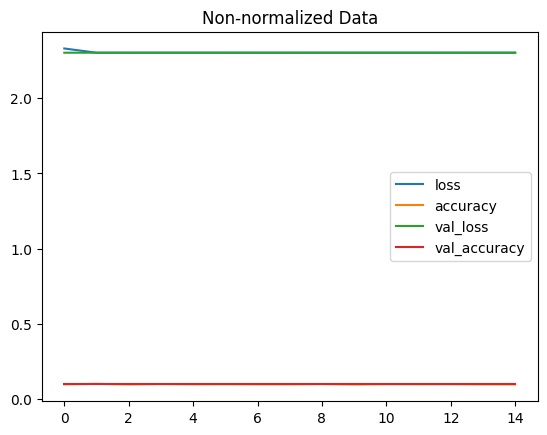

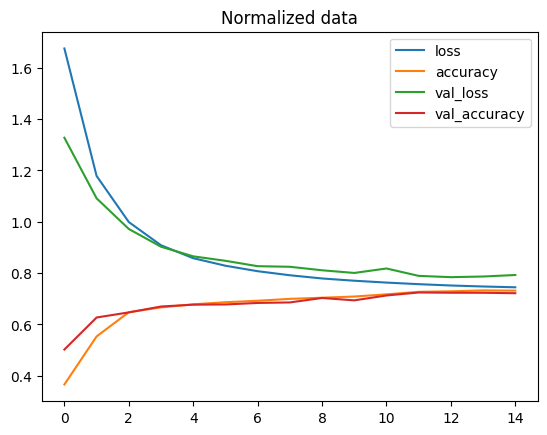

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(history_2.history).plot(title="Normalized data");



# Making a model with learning Rate callback



In [ ]:
tf.random.set_seed(42)

#creating model

model_3 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,
    tf.keras.layers.Dense(4 , activation="relu") ,
    tf.keras.layers.Dense(4 ,activation="relu"),
    tf.keras.layers.Dense(10 ,activation="softmax")
])

model_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
    optimizer=tf.keras.optimizers.Adam(),
    metrics="accuracy" )


#callbacks

lr =tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 *  10**(epoch/20) )

history_3 = model_3.fit(x_train_nol ,y_train,
                       epochs=15 ,
                       validation_data=(x_test_nol ,y_test),
                       callbacks=[lr]
                       )


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9195 - accuracy: 0.6702 - val_loss: 0.7113 - val_accuracy: 0.7556 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6362 - accuracy: 0.7817 - val_loss: 0.6508 - val_accuracy: 0.7758 - lr: 0.0011
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5878 - accuracy: 0.8007 - val_loss: 0.6131 - val_accuracy: 0.7851 - lr: 0.0013
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5603 - accuracy: 0.8075 - val_loss: 0.5866 - val_accuracy: 0.7955 - lr: 0.0014
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5462 - accuracy: 0.8112 - val_loss: 0.5735 - val_accuracy: 0.8057 - lr: 0.0016
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5372 - accuracy: 0.8130 - val_loss: 0.5632 - val_accuracy: 0.8043 - lr: 0.0018
Epoch 7/15
1875/1875 [==============================] - 4s

#  Plot the learning rate decay curve

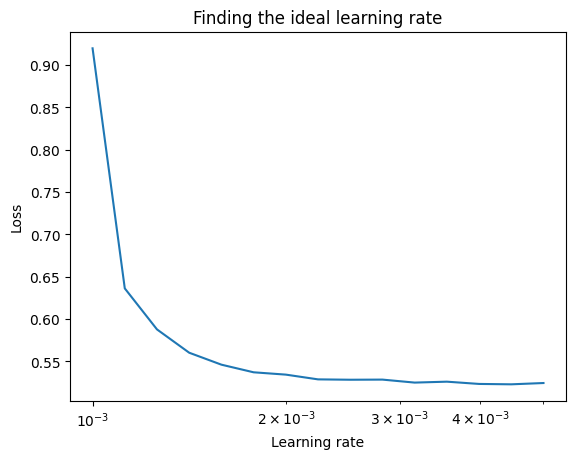

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(15)/20))
plt.semilogx(lrs, history_3.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [ ]:
# Is the best learning rate
3e-3

0.003

## Making model with best learning rate

In [ ]:
tf.random.set_seed(42)


model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,
    tf.keras.layers.Dense(4 ,activation="relu") ,
    tf.keras.layers.Dense(4 ,activation="relu") ,
    tf.keras.layers.Dense(10,activation="softmax")

])

model_4.compile(

                loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer =tf.keras.optimizers.Adam(lr=0.003  ) ,
                metrics='accuracy'
)


history_4 =model_4.fit( x_train_nol , y_train ,
                       epochs=15 ,
                        validation_data =(x_test_nol ,y_test)
                        )


Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2613 - accuracy: 0.4972 - val_loss: 0.8801 - val_accuracy: 0.6916
Epoch 2/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7777 - accuracy: 0.7379 - val_loss: 0.7381 - val_accuracy: 0.7544
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6827 - accuracy: 0.7660 - val_loss: 0.6898 - val_accuracy: 0.7660
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6484 - accuracy: 0.7756 - val_loss: 0.6746 - val_accuracy: 0.7703
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6308 - accuracy: 0.7799 - val_loss: 0.6531 - val_accuracy: 0.7755
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6192 - accuracy: 0.7825 - val_loss: 0.6607 - val_accuracy: 0.7695
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6123 - accuracy: 0.7855 - val_loss: 0.6432 - val_accuracy:

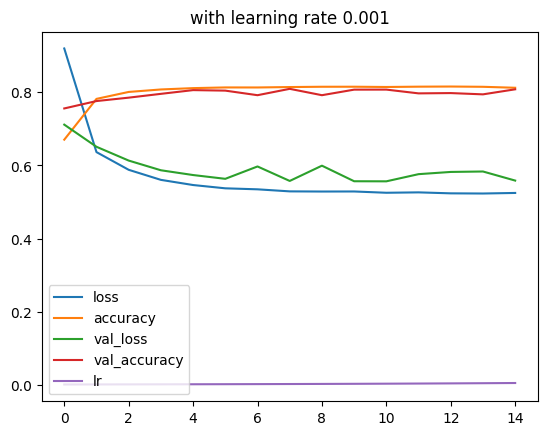

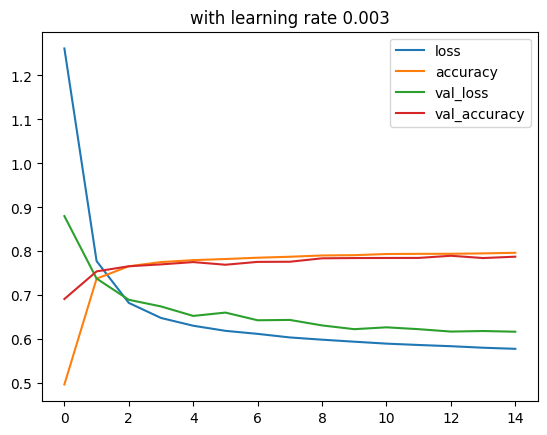

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_3.history).plot(title="with learning rate 0.001")
# Plot normalized data loss curves
pd.DataFrame(history_4.history).plot(title="with learning rate 0.003");

# Improving model more by adding layers and increasing epochs

In [ ]:
tf.random.set_seed(42)


model_5=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,
    tf.keras.layers.Dense(4 ,activation="relu") ,
    tf.keras.layers.Dense(4 ,activation="relu") ,
    tf.keras.layers.Dense(4 ,activation="relu"),  #Extra layers
    tf.keras.layers.Dense(10,activation="softmax")

])

model_5.compile(

                loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer =tf.keras.optimizers.Adam(lr=0.003  ) ,
                metrics='accuracy'
)


history_5 =model_5.fit( x_train_nol , y_train ,
                       epochs=40 , #increasings epochs
                        validation_data =(x_test_nol ,y_test)
                        )


Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.8687 - accuracy: 0.2395 - val_loss: 1.6998 - val_accuracy: 0.2958
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6576 - accuracy: 0.3049 - val_loss: 1.6014 - val_accuracy: 0.3473
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4897 - accuracy: 0.3762 - val_loss: 1.4422 - val_accuracy: 0.3863
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4131 - accuracy: 0.3797 - val_loss: 1.3920 - val_accuracy: 0.3994
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3760 - accuracy: 0.3935 - val_loss: 1.3700 - val_accuracy: 0.4147
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3517 - accuracy: 0.4137 - val_loss: 1.3465 - val_accuracy: 0.4064
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3308 - accuracy: 0.4320 - val_loss: 1.3268 - val_accuracy:

In [ ]:
model_5.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 4)                 3140      
                                                                 
 dense_41 (Dense)            (None, 4)                 20        
                                                                 
 dense_42 (Dense)            (None, 4)                 20        
                                                                 
 dense_43 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,230
Trainable params: 3,230
Non-trainable params: 0
_________________________________________________________________


# Changing layers hidden units

In [ ]:
tf.random.set_seed(42)


model_6=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)) ,
    tf.keras.layers.Dense(100 ,activation="relu") ,
    tf.keras.layers.Dense(50 ,activation="relu") ,
    tf.keras.layers.Dense(20 ,activation="relu"),  #Extra layers
    tf.keras.layers.Dense(10,activation="softmax")

])

model_6.compile(

                loss=tf.keras.losses.SparseCategoricalCrossentropy() ,
                optimizer =tf.keras.optimizers.Adam(lr=0.003  ) ,
                metrics='accuracy'
)


history_6 =model_6.fit( x_train_nol , y_train ,
                       epochs=50 , #increasings epochs
                        validation_data =(x_test_nol ,y_test)
                        )


Epoch 1/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5256 - accuracy: 0.8146 - val_loss: 0.4267 - val_accuracy: 0.8459
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3816 - accuracy: 0.8625 - val_loss: 0.4480 - val_accuracy: 0.8478
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3434 - accuracy: 0.8756 - val_loss: 0.4048 - val_accuracy: 0.8511
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3191 - accuracy: 0.8835 - val_loss: 0.3720 - val_accuracy: 0.8678
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3028 - accuracy: 0.8879 - val_loss: 0.3600 - val_accuracy: 0.8677
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2870 - accuracy: 0.8929 - val_loss: 0.3693 - val_accuracy: 0.8615
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2784 - accuracy: 0.8970 - val_loss: 0.3665 - val_accuracy

In [ ]:
model_6.evaluate(x_train_nol , y_train )

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1029 - accuracy: 0.9608


[0.10286303609609604, 0.9608333110809326]

In [ ]:
model_6.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 100)               78500     
                                                                 
 dense_49 (Dense)            (None, 50)                5050      
                                                                 
 dense_50 (Dense)            (None, 20)                1020      
                                                                 
 dense_51 (Dense)            (None, 10)                210       
                                                                 
Total params: 84,780
Trainable params: 84,780
Non-trainable params: 0
_________________________________________________________________


# Comparing

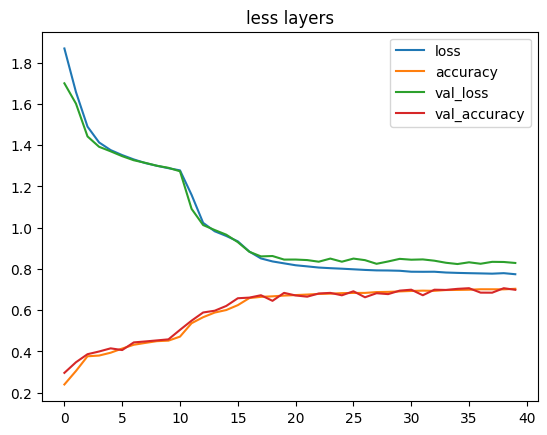

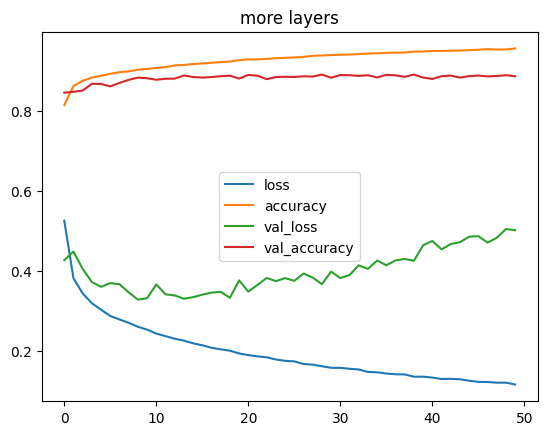

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(history_5.history).plot(title="less layers")
# Plot normalized data loss curves
pd.DataFrame(history_6.history).plot(title="more layers");